In [1]:
#importing packages
import pandas as pd

In [2]:
filepath = r"D:\Academics\6th semester\Machine Learning\LAB\LAB-3\data.csv"

In [3]:
df=pd.read_csv(filepath)

In [4]:
df

,Gender,Age,AnnualSalary,Brand,City,Purchased
0,Male,<=25,9 - 20jt,Avanza,Bandung,Tidak
1,Male,26-30,<=8jt,Pajero,Jakarta,Tidak
2,Male,>=30,<=8jt,Ioniq5,Surabaya,Tidak
3,Male,>=30,>=20jt,Pajero,Bandung,Ya
4,Male,26-30,9 - 20jt,Ioniq5,Jakarta,Tidak
5,Female,26-30,9 - 20jt,Ioniq5,Surabaya,Ya
6,Female,<=25,9 - 20jt,Avanza,Jakarta,Ya
7,Male,>=30,<=8jt,Ioniq5,Bandung,Tidak
8,Female,26-30,<=8jt,Avanza,Surabaya,Tidak
9,Male,26-30,>=20jt,Ioniq5,Jakarta,Tidak


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Gender        26 non-null     object
 1   Age           26 non-null     object
 2   AnnualSalary  26 non-null     object
 3   Brand         26 non-null     object
 4   City          26 non-null     object
 5   Purchased     26 non-null     object
dtypes: object(6)
memory usage: 1.3+ KB


In [6]:
df.head()

,Gender,Age,AnnualSalary,Brand,City,Purchased
0,Male,<=25,9 - 20jt,Avanza,Bandung,Tidak
1,Male,26-30,<=8jt,Pajero,Jakarta,Tidak
2,Male,>=30,<=8jt,Ioniq5,Surabaya,Tidak
3,Male,>=30,>=20jt,Pajero,Bandung,Ya
4,Male,26-30,9 - 20jt,Ioniq5,Jakarta,Tidak


Data preprocessing

In [7]:
for i in df:
    print(df[i].unique())

['Male' 'Female']
['<=25' '26-30' '>=30']
['9 - 20jt' '<=8jt' '>=20jt']
['Avanza' 'Pajero' 'Ioniq5']
['Bandung' 'Jakarta' 'Surabaya']
['Tidak' 'Ya']


Replacing the Names

In [8]:
df['Purchased']=df['Purchased'].replace({'Tidak':'No','Ya':'Yes'})

In [9]:
df['City']=df['City'].replace({'Bandung':'Chennai','Jakarta':'Mumbai','Surabaya':'Hyderabad'})

In [10]:
df['Brand']=df['Brand'].replace({'Avanza':'BMW','Pajero':'Toyata','Ioniq5':'Tata Motors'})

In [11]:
df['AnnualSalary']=df['AnnualSalary'].replace({'9 - 20jt':'9-20L','<=8jt':'<=8L','>=20jt':'>=20L'})

In [12]:
df.head()

,Gender,Age,AnnualSalary,Brand,City,Purchased
0,Male,<=25,9-20L,BMW,Chennai,No
1,Male,26-30,<=8L,Toyata,Mumbai,No
2,Male,>=30,<=8L,Tata Motors,Hyderabad,No
3,Male,>=30,>=20L,Toyata,Chennai,Yes
4,Male,26-30,9-20L,Tata Motors,Mumbai,No


In [13]:
# check missing values in variables

df.isnull().sum()

Gender          0
Age             0
AnnualSalary    0
Brand           0
City            0
Purchased       0
dtype: int64

In [14]:
X=df.drop(['Purchased'], axis=1)
y=df['Purchased']

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [79]:
X_train.shape,X_test.shape

((18, 5), (8, 5))

In [80]:
X_train.dtypes

Gender          object
Age             object
AnnualSalary    object
Brand           object
City            object
dtype: object

Encode categorical variables
Now, I will encode the categorical variables.

In [81]:
X_train.head()

,Gender,Age,AnnualSalary,Brand,City
23,Male,<=25,9-20L,Toyata,Mumbai
5,Female,26-30,9-20L,Tata Motors,Hyderabad
2,Male,>=30,<=8L,Tata Motors,Hyderabad
12,Female,>=30,9-20L,Tata Motors,Mumbai
15,Female,>=30,>=20L,BMW,Mumbai


In [82]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [83]:
#import category encode
import category_encoders as ce

In [84]:
encoder = ce.OrdinalEncoder(cols=['Gender','Age','AnnualSalary','Brand','City'])

In [85]:
X_train= encoder.fit_transform(X_train)

In [86]:
X_test=encoder.fit_transform(X_test)

In [87]:
X_train.head()


,Gender,Age,AnnualSalary,Brand,City
23,1,1,1,1,1
5,2,2,1,2,2
2,1,3,2,2,2
12,2,3,1,2,1
15,2,3,3,3,1


In [88]:
X_test.head()

,Gender,Age,AnnualSalary,Brand,City
8,1,1,1,1,1
16,2,1,2,2,1
0,2,2,2,1,2
24,1,3,2,1,3
11,2,1,2,2,2


We now have training and test set ready for model building.

In [89]:
#import Decision trees classification
from sklearn.tree import DecisionTreeClassifier

In [90]:
#the DecisionTreeClassifier model with criterion entropy
dt_en =  DecisionTreeClassifier(criterion='entropy', max_depth=3,random_state=0)

In [91]:
#fit_model
dt_en.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

Predict the Test set results with criterion entropy

In [92]:
y_pred_en = dt_en.predict(X_test)

Check accuracy score with criterion entropy

In [102]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.5000


In [ ]:
y_pred_train_en = clf_en.predict(X_train)

In [103]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.8889


In [109]:
print('Training set score: {:.4f}'.format(dt_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(dt_en.score(X_test, y_test)))

Training set score: 0.8889
Test set score: 0.5000


[Text(0.625, 0.875, 'x[2] <= 2.5\nentropy = 0.991\nsamples = 18\nvalue = [8, 10]'),
 Text(0.5, 0.625, 'x[1] <= 2.5\nentropy = 0.985\nsamples = 14\nvalue = [8, 6]'),
 Text(0.25, 0.375, 'x[0] <= 1.5\nentropy = 0.954\nsamples = 8\nvalue = [3, 5]'),
 Text(0.125, 0.125, 'entropy = 0.971\nsamples = 5\nvalue = [3, 2]'),
 Text(0.375, 0.125, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.75, 0.375, 'x[3] <= 2.5\nentropy = 0.65\nsamples = 6\nvalue = [5, 1]'),
 Text(0.625, 0.125, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.625, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]')]

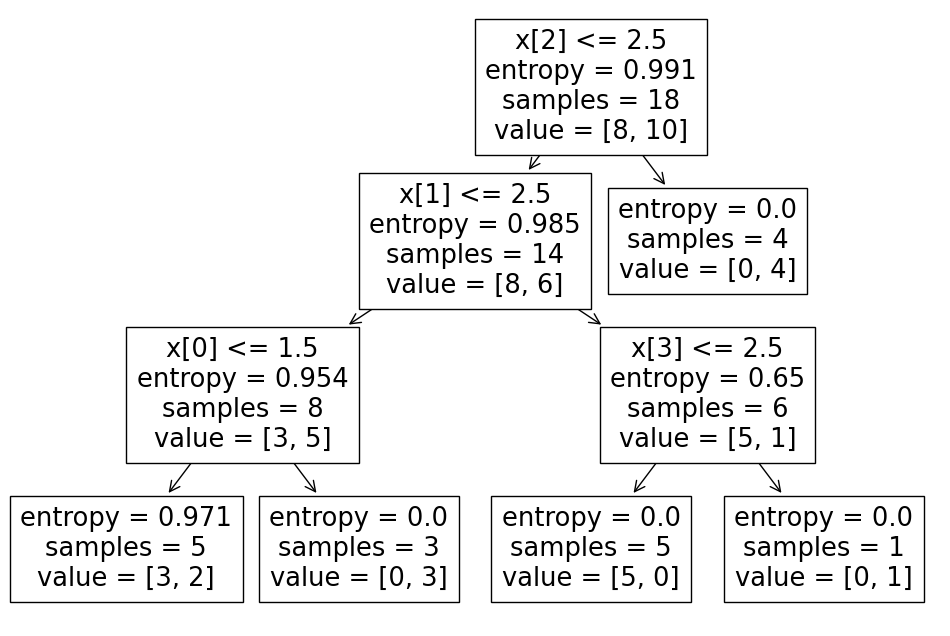

In [96]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))


from sklearn import tree

tree.plot_tree(dt_en.fit(X_train, y_train)) 

In [99]:
pip install graphviz


     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     -------------------------- ------------- 30.7/47.0 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 47.0/47.0 kB 593.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [107]:
from sklearn.metrics import classification_report

In [108]:
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

          No       1.00      0.43      0.60         7
         Yes       0.20      1.00      0.33         1

    accuracy                           0.50         8
   macro avg       0.60      0.71      0.47         8
weighted avg       0.90      0.50      0.57         8

